In [1]:
import pandas as pd
import os
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuración de rutas
base_dir = os.getcwd()
fichero_path = os.path.join(
    base_dir, "..", "data", "raw", "thyroid_cancer_risk_data.csv"
)


In [3]:
df = pd.read_csv(fichero_path)
df

Patient_ID  Age  Gender  Country       Ethnicity Family_History  \
0                1   66    Male   Russia       Caucasian             No   
1                2   29    Male  Germany        Hispanic             No   
2                3   86    Male  Nigeria       Caucasian             No   
3                4   75  Female    India           Asian             No   
4                5   35  Female  Germany         African            Yes   
...            ...  ...     ...      ...             ...            ...   
212686      212687   58  Female    India           Asian             No   
212687      212688   89    Male    Japan  Middle Eastern             No   
212688      212689   72  Female  Nigeria        Hispanic             No   
212689      212690   85  Female   Brazil  Middle Eastern             No   
212690      212691   46  Female    Japan  Middle Eastern             No   

       Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  \
0                     Yes                No      No      No       No   
1                     Yes                No      No      No       No   
2                      No                No      No      No       No   
3                      No                No      No      No       No   
4                     Yes                No      No      No       No   
...                   ...               ...     ...     ...      ...   
212686                 No                No      No     Yes       No   
212687                 No                No      No     Yes       No   
212688                 No                No      No      No      Yes   
212689                 No                No      No      No      Yes   
212690                 No                No     Yes      No       No   

        TSH_Level  T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk  \
0            9.37      1.67      6.16         1.08                 Low   
1            1.83      1.73     10.54         4.05                 Low   
2            6.26      2.59     10.57         4.61                 Low   
3            4.10      2.62     11.04         2.46              Medium   
4            9.10      2.11     10.71         2.11                High   
...           ...       ...       ...          ...                 ...   
212686       2.00      0.64     11.92         1.48                 Low   
212687       9.77      3.25      7.30         4.46              Medium   
212688       7.72      2.44      8.71         2.36              Medium   
212689       5.62      2.53      9.62         1.54              Medium   
212690       5.60      2.73     10.59         2.53                 Low   

        Diagnosis  
0          Benign  
1          Benign  
2          Benign  
3          Benign  
4          Benign  
...           ...  
212686     Benign  
212687     Benign  
212688     Benign  
212689     Benign  
212690  Malignant  

[212691 rows x 17 columns]

In [4]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

In [5]:
# No hay nulos
df.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [6]:
# 10 paises
df["Country"].value_counts()

Country
India          42496
China          31978
Nigeria        31918
Brazil         21413
Russia         21297
Japan          16867
South Korea    14965
UK             10642
USA            10558
Germany        10557
Name: count, dtype: int64

In [7]:
# Menos etnias, sería interesante ver la relación de los dos variables con la objetivo y elegir una
df["Ethnicity"].value_counts()

Ethnicity
Caucasian         63669
Asian             53261
African           42414
Hispanic          32012
Middle Eastern    21335
Name: count, dtype: int64

In [8]:
df["Diagnosis"].value_counts()

Diagnosis
Benign       163196
Malignant     49495
Name: count, dtype: int64

In [9]:
# No parece haber outliers
df["Age"].describe()

count    212691.000000
mean         51.918497
std          21.632815
min          15.000000
25%          33.000000
50%          52.000000
75%          71.000000
max          89.000000
Name: Age, dtype: float64

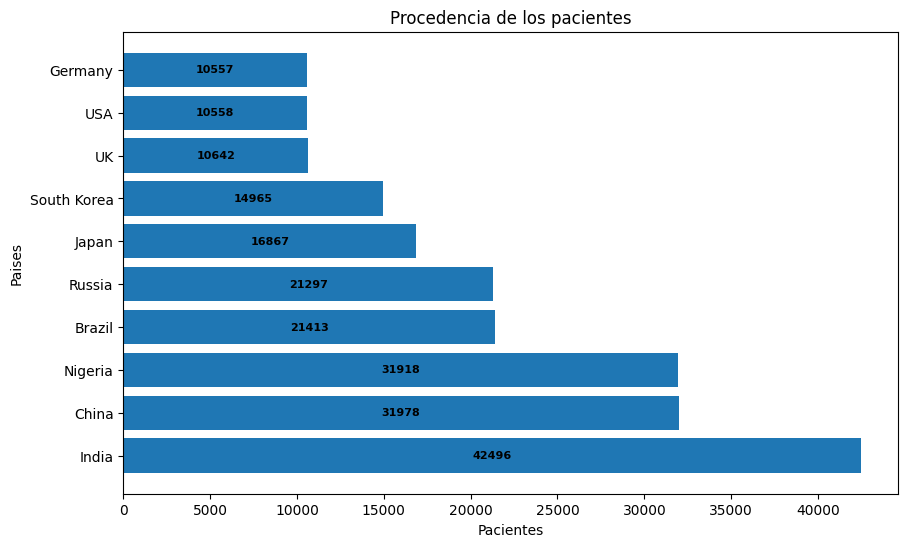

In [10]:
# Dataframe que contiene paises y registros
df_counts = df['Country'].value_counts().reset_index()
df_counts.columns = ['Country', 'Registros']
df_counts = df_counts.sort_values(by='Registros', ascending=False)

plt.figure(figsize=(10, 6))
bars=plt.barh(df_counts['Country'], df_counts['Registros'])
plt.title("Procedencia de los pacientes")
plt.xlabel("Pacientes")
plt.ylabel("Paises")

# Texto de las barras
for bar in bars:
    plt.text(bar.get_width() / 2,  # Posición X (mitad de la barra)
             bar.get_y() + bar.get_height() / 2,  # Posición Y (centro de la barra)
             str(int(bar.get_width())),  # Convertir el número en texto
             ha='center', va='center', color='black', fontsize=8, fontweight='bold')

plt.show()


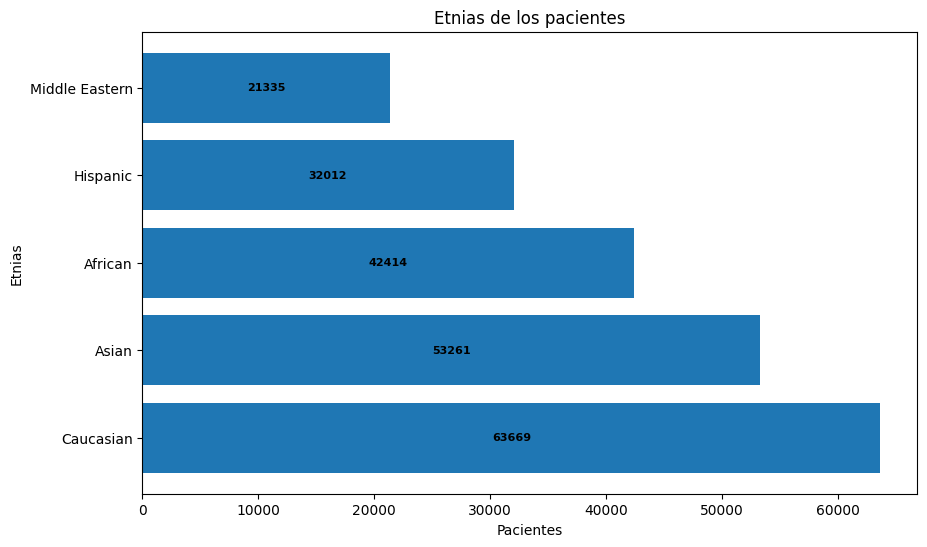

In [11]:
# Dataframe que contiene paises y registros
df_counts = df['Ethnicity'].value_counts().reset_index()
df_counts.columns = ['Ethnicity', 'Registros']
df_counts = df_counts.sort_values(by='Registros', ascending=False)

plt.figure(figsize=(10, 6))
bars=plt.barh(df_counts['Ethnicity'], df_counts['Registros'])
plt.title("Etnias de los pacientes")
plt.xlabel("Pacientes")
plt.ylabel("Etnias")

# Texto de las barras
for bar in bars:
    plt.text(bar.get_width() / 2,  # Posición X (mitad de la barra)
             bar.get_y() + bar.get_height() / 2,  # Posición Y (centro de la barra)
             str(int(bar.get_width())),  # Convertir el número en texto
             ha='center', va='center', color='black', fontsize=8, fontweight='bold')

plt.show()


<BarContainer object of 2 artists>

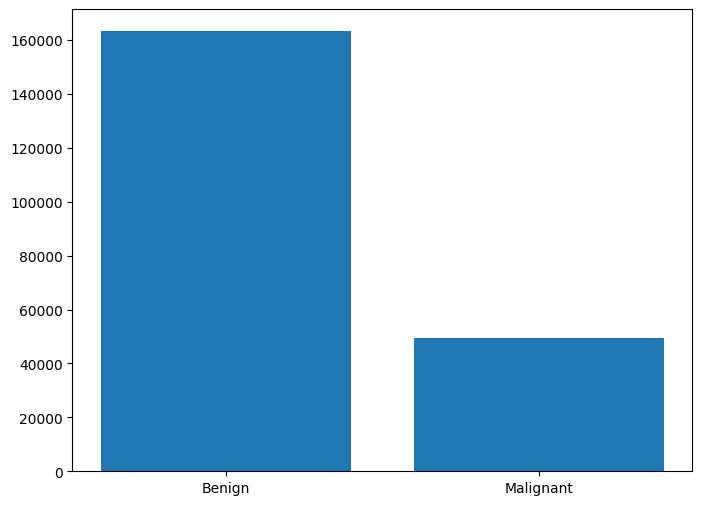

In [12]:
plt.figure(figsize=(8, 6))

plt.bar( df["Diagnosis"].value_counts().index, df["Diagnosis"].value_counts().values)

Text(0.5, 1.0, 'Diagnósticos de Tiroides por País')

<Figure size 1200x600 with 0 Axes>

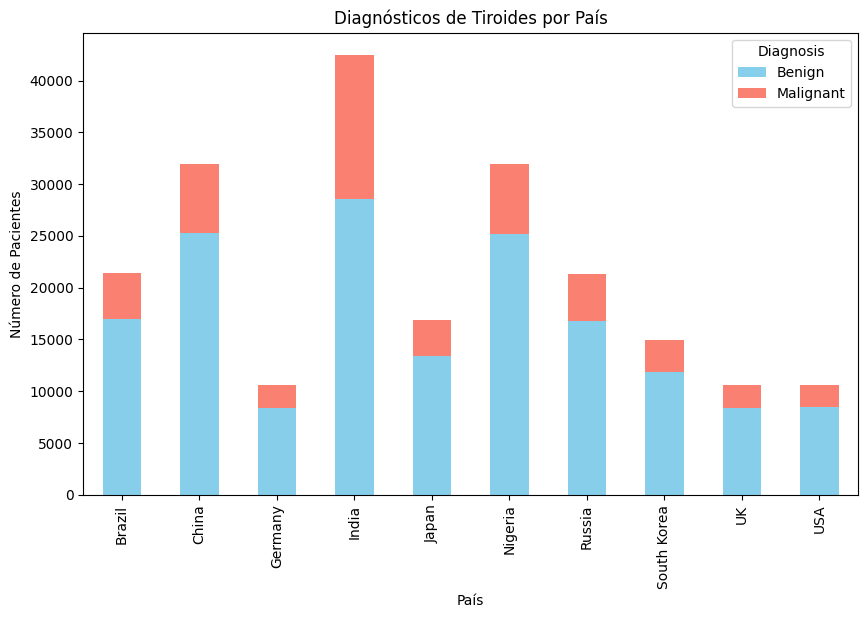

In [13]:
plt.figure(figsize=(12, 6))

df_stacked = df.groupby(['Country', 'Diagnosis']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
df_stacked.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'])
# Etiquetas y título
plt.ylabel('Número de Pacientes')
plt.xlabel('País')
plt.title('Diagnósticos de Tiroides por País')

Text(0.5, 1.0, 'Diagnósticos de Tiroides por Etnia')

<Figure size 1200x600 with 0 Axes>

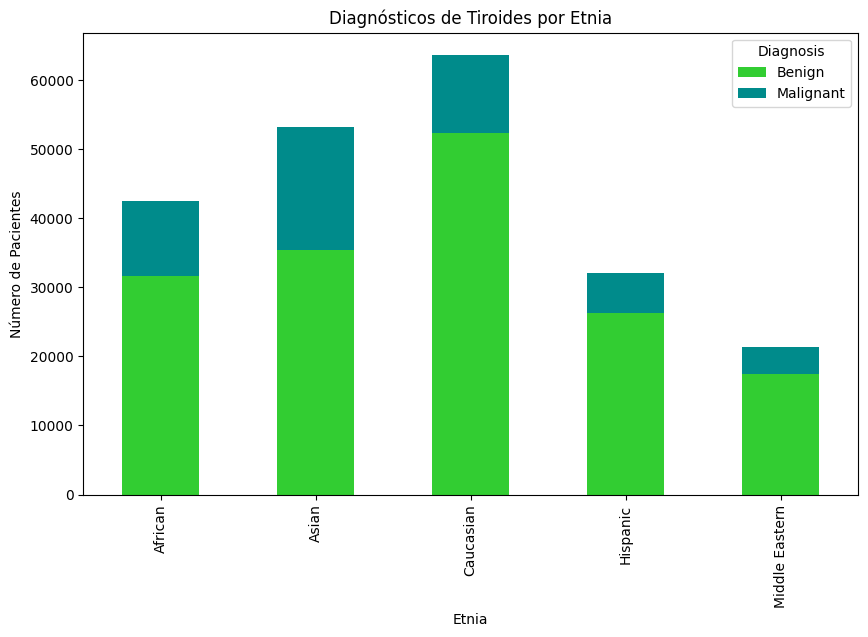

In [14]:
plt.figure(figsize=(12, 6))

df_stacked = df.groupby(['Ethnicity', 'Diagnosis']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
df_stacked.plot(kind='bar', stacked=True, ax=ax, color=['limegreen', 'darkcyan'])
# Etiquetas y título
plt.ylabel('Número de Pacientes')
plt.xlabel('Etnia')
plt.title('Diagnósticos de Tiroides por Etnia')

Text(0.5, 1.0, 'Riesgo de Cáncer por Diagnóstico')

<Figure size 1200x600 with 0 Axes>

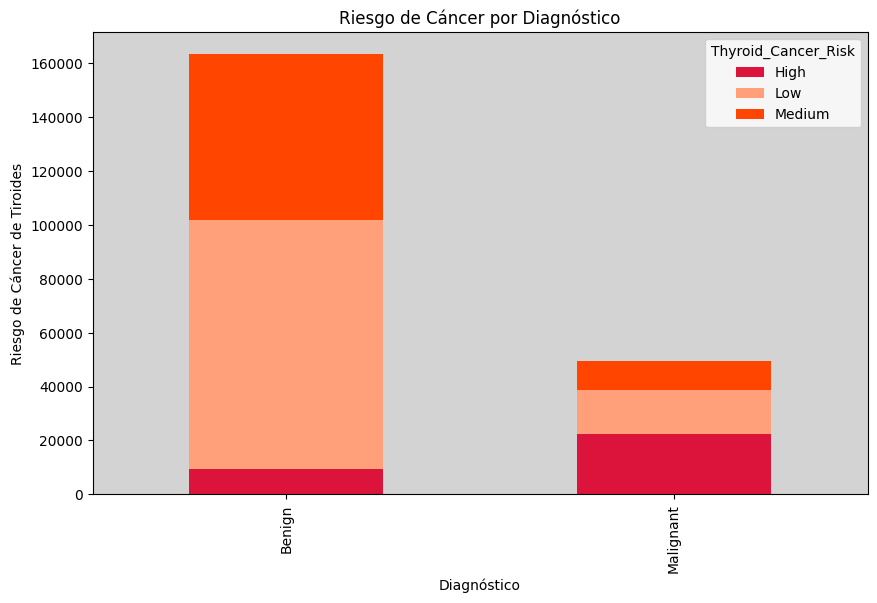

In [15]:
plt.figure(figsize=(12, 6))

df_stacked = df.groupby(['Diagnosis', 'Thyroid_Cancer_Risk']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
df_stacked.plot(kind='bar', stacked=True, ax=ax, color=['crimson', 'lightsalmon',"orangered"])
# Etiquetas y título
ax.set_facecolor("lightgrey")

plt.ylabel('Riesgo de Cáncer de Tiroides')
plt.xlabel('Diagnóstico')
plt.title('Riesgo de Cáncer por Diagnóstico')

In [16]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

In [18]:
# Columnas que no van a ser necesarias
df_limpio = df.drop(columns=["Patient_ID","Thyroid_Cancer_Risk"])

In [19]:
for i, valor in enumerate(df_limpio["Diagnosis"]):
    if valor == "Benign":
        df_limpio.loc[i, "Diagnostico"] = 0
    else:
        df_limpio.loc[i, "Diagnostico"] = 1
        
df_limpio.drop(columns = "Diagnosis", inplace = True)
        

In [20]:
df_limpio["Diagnostico"] = df_limpio["Diagnostico"].astype(int)
df_limpio[["Diagnostico"]].value_counts()

Diagnostico
0              163196
1               49495
Name: count, dtype: int64

In [21]:
df_limpio.head(5)

Age  Gender  Country  Ethnicity Family_History Radiation_Exposure  \
0   66    Male   Russia  Caucasian             No                Yes   
1   29    Male  Germany   Hispanic             No                Yes   
2   86    Male  Nigeria  Caucasian             No                 No   
3   75  Female    India      Asian             No                 No   
4   35  Female  Germany    African            Yes                Yes   

  Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  T3_Level  T4_Level  \
0                No      No      No       No       9.37      1.67      6.16   
1                No      No      No       No       1.83      1.73     10.54   
2                No      No      No       No       6.26      2.59     10.57   
3                No      No      No       No       4.10      2.62     11.04   
4                No      No      No       No       9.10      2.11     10.71   

   Nodule_Size  Diagnostico  
0         1.08            0  
1         4.05            0  
2         4.61            0  
3         2.46            0  
4         2.11            0

In [22]:
df_limpio.to_csv("../data/processed/thiroid_cancer_processed.csv", index=False)